## Airline Passenger Satisfaction Data Analysis and Visualisation Project
**Team #27:** [Maryna Kostiuk](https://github.com/samamaryna), [Ying Li](https://github.com/yingliamanda), [Yinglin Zhang](https://github.com/Jolin0101), [Tetiana Nurkanova](https://github.com/nurkanovat)

Welcome to our second team project within Data Science Certificate. For this project we used the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Within this project we will analyse data and answer such questions as: 
- What percentage of airline passengers are satisfied?
- Does satisfaction vary by customer type?
- What is the customer profile for a repeating airline passenger?
- Does flight distance affect customer preferences or flight patterns?
- Which factors contribute to customer satisfaction the most? What about dissatisfaction?
  
We hope that with the answers to this questions the airline company can improve the services and increase the satisfaction rate between customers. 


Unfortunately, the data source doesn't provide any information about the collection of data, sampling methods, and other details. We also couldn't find this information online. 

In [2]:
#to import librariers we will be working with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
#to import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Data exploration and cleaning

In [4]:
#to check how many rows and columns our dataframe has:
df.shape

(129880, 24)

In [5]:
# to see what columns look like
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
# to explore how many null values we have: 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [7]:
#to remove null values from dataset

df.dropna(subset=['Arrival Delay'], inplace=True)

In [8]:
#to check for null values again

df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [9]:
#to check for duplicates

df.duplicated().sum()

0

## Exploratory Analysis
In this part of our project we will explore the data, correlation between different services and their impact to satisfaction, flying patterns for distance, and other questions to understand, how company can improve its satisfaction score. 

### What percentage of airline passengers are satisfied?
To answer this question we will be comparing the number of satisfied and neutral or dissatisfied customers. 

In [10]:
#to calculate the percentage of satisfied customers: 

satisf = df['Satisfaction'].value_counts()
satisf_percentages = round(satisf / satisf.sum() * 100, 2)

print(satisf_percentages)



Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: Satisfaction, dtype: float64


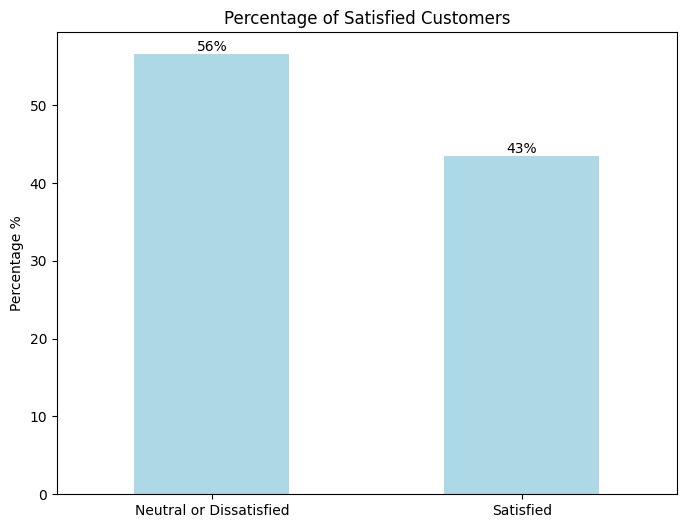

In [11]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
bars = satisf_percentages.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfied Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

The analysis shows that 43.5% of customers are satisfied with services that this airline company provides. 

"Typically, anything above 70% is considered a good customer satisfaction score, while a less-desirable score is anything below 50%. The average CSAT score across all industries is 78%, but that can vary widely depending on your industry, product, service, and customer base."-[What Is a Customer Satisfaction Score (CSAT)? by Katie Muse](https://www.salesforce.com/service/customer-service-incident-management/customer-satisfaction-score/)

We recommend to explore data more to find out, how what services can be improved to increase the satisfaction score. 

### Does satisfaction vary by customer type?
To answer this question we will be comparing satisfaction rate between Returning and First-time customers. 

Firstly, we want to compare number of Returning and First-time customers overall: 

In [12]:
#to check how many returning and first-time customers we have: 
cust_type = df['Customer Type'].value_counts()

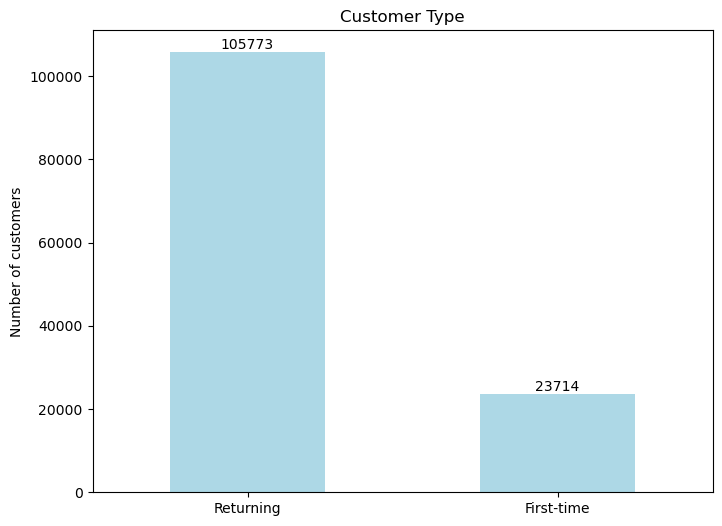

In [12]:
plt.figure(figsize=(8,6))
bars_custtype = cust_type.plot(kind='bar', color='lightblue')

plt.title('Customer Type')
plt.xlabel('')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)

for bar in bars_custtype.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom')

Next, we will be answering the question: 
### How many Returning customers are satisfied?

In [13]:
#how many Returning customers are satisfied: 
#to filter dataframe: 
returning_filter = df[df['Customer Type'] == 'Returning']

return_satisf = returning_filter['Satisfaction'].value_counts()

return_satisf_percent = round(return_satisf / return_satisf.sum() * 100, 2)

print(return_satisf_percent)


Neutral or Dissatisfied    52.19
Satisfied                  47.81
Name: Satisfaction, dtype: float64


### Percentage of Satisfaction for Returning Customers Visualisation
This visual shows the difference between satisfaction and dissatisfaction rates among Returning customers: 

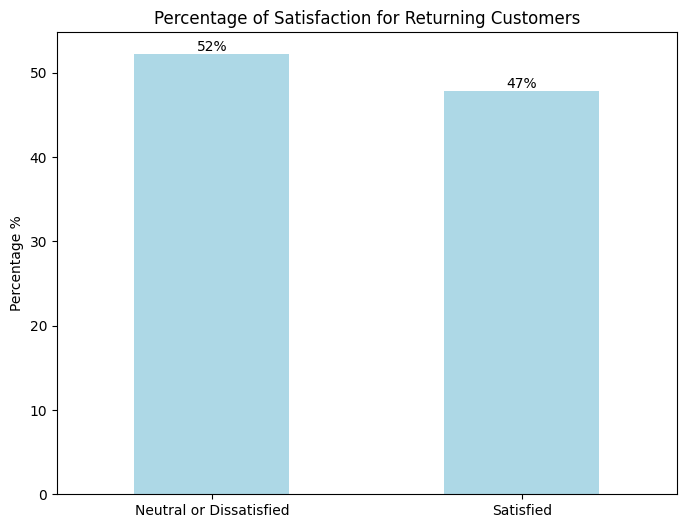

In [14]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
ret_sat_bars = return_satisf_percent.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfaction for Returning Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in ret_sat_bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

Next, we need to find out:
### How many First-time customers are satisfied?

In [15]:
#to filter dataframe: 
ftime_filter = df[df['Customer Type'] == 'First-time']

ftime_satisf = ftime_filter['Satisfaction'].value_counts()

ftime_satisf_percent = round(ftime_satisf / ftime_satisf.sum() * 100, 2)

print(ftime_satisf_percent)


Neutral or Dissatisfied    76.01
Satisfied                  23.99
Name: Satisfaction, dtype: float64


##### Percentage of Satisfaction for First-time Customers Visualisation

This visual shows the difference in satisfaction rate between First-time customers

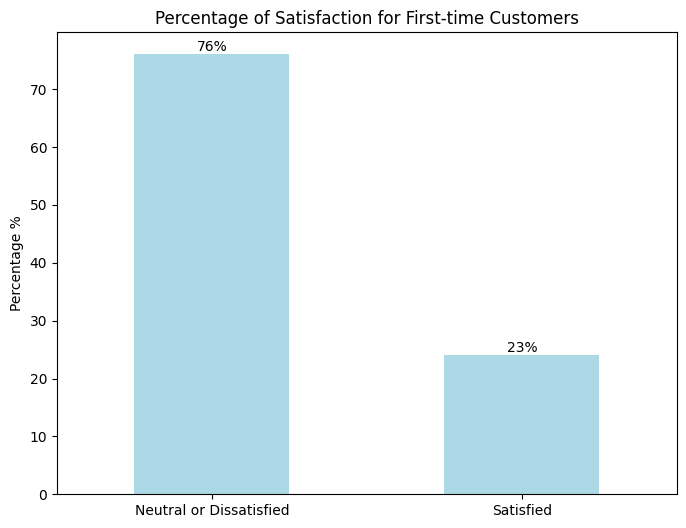

In [16]:
#to create a figure for our future visual:
plt.figure(figsize=(8, 6))

#to create a graph and assign the type of graph and color: 
ftime_sat_bars = ftime_satisf_percent.plot(kind='bar', color='lightblue')

#to assign the title and ylabel:
plt.title('Percentage of Satisfaction for First-time Customers')
plt.ylabel('Percentage %')

#to leave xlabel empty:
plt.xlabel('')

#to assign the rotation for ticks to 0: 
plt.xticks(rotation=0)

#to place percentage values on top of the bars
for bar in ftime_sat_bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            f'{int(yval)}%', 
            ha='center', 
            va='bottom')

plt.show()

The satisfaction rate for Returning customers(47%) are much higher than for First-time customers (23%). But even for the Returning customers the rate is still below the 70% which is considered as a good satisfaction rate (according to Katie Muse from the source above). We need to explore data more, to find out what services the company can improve. 

### What is the customer profile for a repeating airline passenger? 

To create a customer profile for a repeating airline passenger, we'll focus on analyzing passengers identified as "Returning" under the "Customer Type" column. 

In [17]:
# Filter the dataset for returning customers
returning_customers = df[df['Customer Type'] == 'Returning']

Let's extract relevant insights about these passengers to understand their characteristics and preferences.

In [18]:
# Age distribution
age_distribution = returning_customers['Age'].describe()

# Gender distribution
gender_distribution = returning_customers['Gender'].value_counts(normalize=True) * 100

print("Age Distribution:\n", age_distribution)
print("\nGender Distribution:\n", gender_distribution)

Age Distribution:
 count    105773.000000
mean         41.463625
std          15.135105
min           7.000000
25%          31.000000
50%          43.000000
75%          53.000000
max          85.000000
Name: Age, dtype: float64

Gender Distribution:
 Female    50.011818
Male      49.988182
Name: Gender, dtype: float64


In [19]:
# Type of Travel distribution
type_of_travel_distribution = returning_customers['Type of Travel'].value_counts(normalize=True) * 100

# Class distribution
class_distribution = returning_customers['Class'].value_counts(normalize=True) * 100

print("\nType of Travel Distribution:\n", type_of_travel_distribution)
print("\nClass Distribution:\n", class_distribution)


Type of Travel Distribution:
 Business    62.331597
Personal    37.668403
Name: Type of Travel, dtype: float64

Class Distribution:
 Business        49.899313
Economy         42.094864
Economy Plus     8.005824
Name: Class, dtype: float64


In [20]:
# Overall satisfaction distribution
satisfaction_distribution = returning_customers['Satisfaction'].value_counts(normalize=True) * 100

# Specific service ratings
service_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Gate Location',
    'Food and Drink', 'Online Boarding', 'Seat Comfort', 'In-flight Entertainment',
    'On-board Service', 'Leg Room Service', 'Baggage Handling', 'Check-in Service',
    'In-flight Service', 'In-flight Wifi Service', 'Cleanliness'
]

service_satisfaction = returning_customers[service_columns].mean().sort_values()

print("\nOverall Satisfaction Distribution:\n", satisfaction_distribution)
print("\nService Satisfaction Ratings:\n", service_satisfaction)


Overall Satisfaction Distribution:
 Neutral or Dissatisfied    52.186286
Satisfied                  47.813714
Name: Satisfaction, dtype: float64

Service Satisfaction Ratings:
 In-flight Wifi Service                    2.732247
Ease of Online Booking                    2.768854
Gate Location                             2.974095
Departure and Arrival Time Convenience    3.206934
Food and Drink                            3.240657
Check-in Service                          3.324979
Cleanliness                               3.336872
Online Boarding                           3.373800
Leg Room Service                          3.380296
On-board Service                          3.416136
In-flight Entertainment                   3.425127
Seat Comfort                              3.539268
Baggage Handling                          3.617908
In-flight Service                         3.629244
dtype: float64


In [21]:
# Departure delay statistics
departure_delay = returning_customers['Departure Delay'].describe()

# Arrival delay statistics
arrival_delay = returning_customers['Arrival Delay'].describe()

print("\nDeparture Delay Statistics:\n", departure_delay)
print("\nArrival Delay Statistics:\n", arrival_delay)


Departure Delay Statistics:
 count    105773.000000
mean         14.569181
std          38.044553
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64

Arrival Delay Statistics:
 count    105773.000000
mean         15.004973
std          38.552532
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64


Visualizations:

Based on these insights, we can create visualizations for better understanding:

Demographic Distribution:

Age: Histogram

Gender: Pie Chart



Travel Preferences:

Type of Travel: Bar Chart

Class Preferences: Bar Chart



Satisfaction Levels:

Overall Satisfaction: Pie Chart

Service Ratings: Bar Chart



Delays:

Departure and Arrival Delays: Box Plot

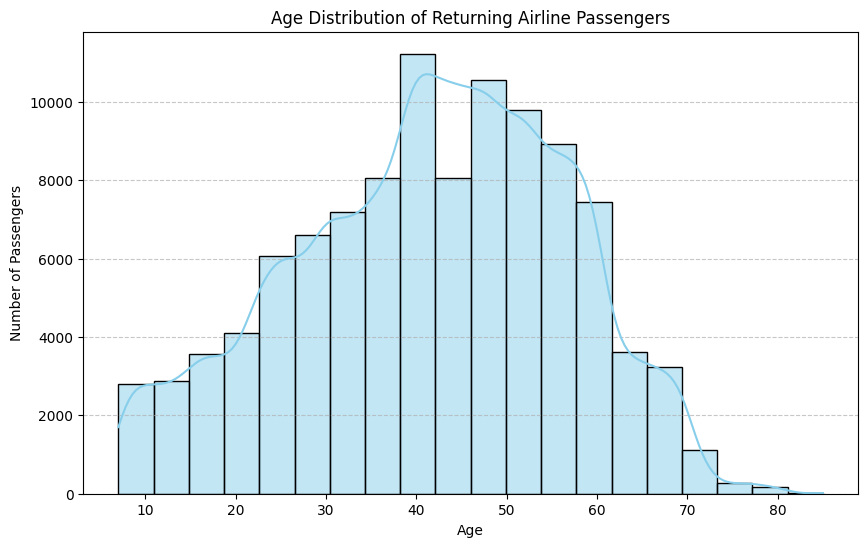

In [22]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(returning_customers['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Returning Airline Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Age Distribution: Most returning passengers are in the 30 to 55 age range, indicating a mature demographic.

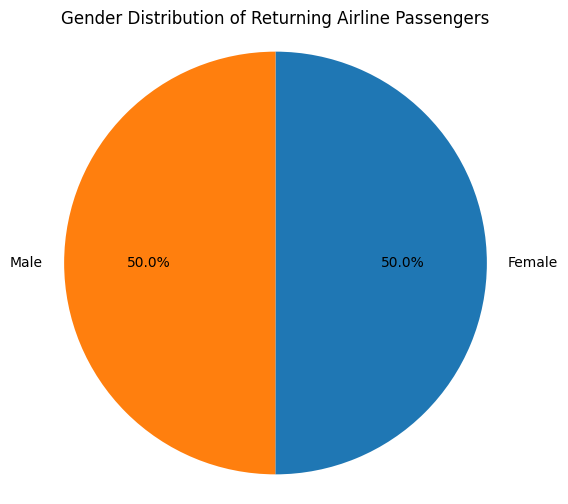

In [23]:
# Gender Distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Gender Distribution of Returning Airline Passengers')
plt.axis('equal')
plt.show()

Gender Distribution: The gender split is almost equal, with a slight tilt towards female passengers.

In [24]:
import warnings

# Hide FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

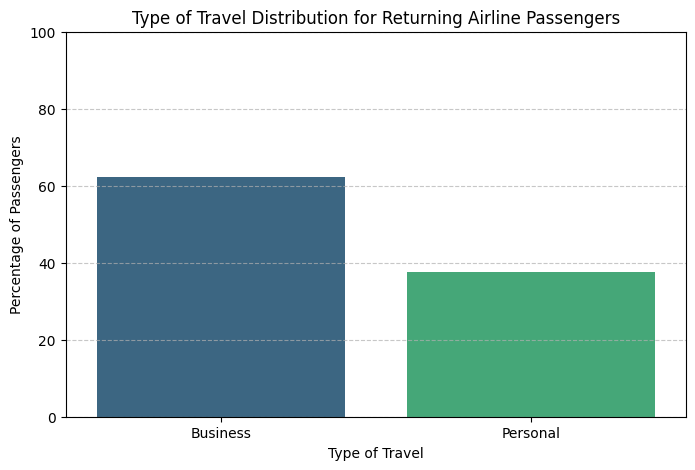

In [25]:
# Type of Travel Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=type_of_travel_distribution.index, y=type_of_travel_distribution.values, palette='viridis')
plt.title('Type of Travel Distribution for Returning Airline Passengers')
plt.xlabel('Type of Travel')
plt.ylabel('Percentage of Passengers')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Type of Travel: A significant portion of returning passengers travel for business purposes (62.3%), indicating a focus on professional trips.

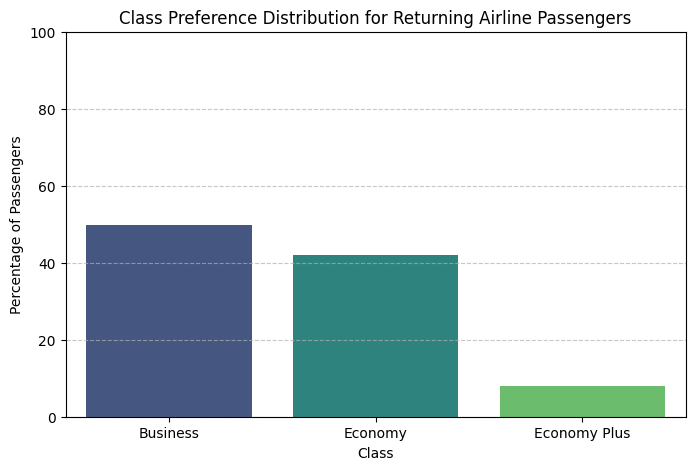

In [26]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Preference Distribution for Returning Airline Passengers')
plt.xlabel('Class')
plt.ylabel('Percentage of Passengers')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Class Preferences: Business Class is the most preferred (49.9%), followed by Economy (42.1%), and a smaller portion opt for Economy Plus (8%).

Overall Satisfaction Distribution was visualized before in Question: Percentage of Satisfaction for Returning Customers Visualisation


The overall satisfaction distribution of returning airline passengers is as follows:

Neutral or Dissatisfied: 52.19%
Satisfied: 47.81%


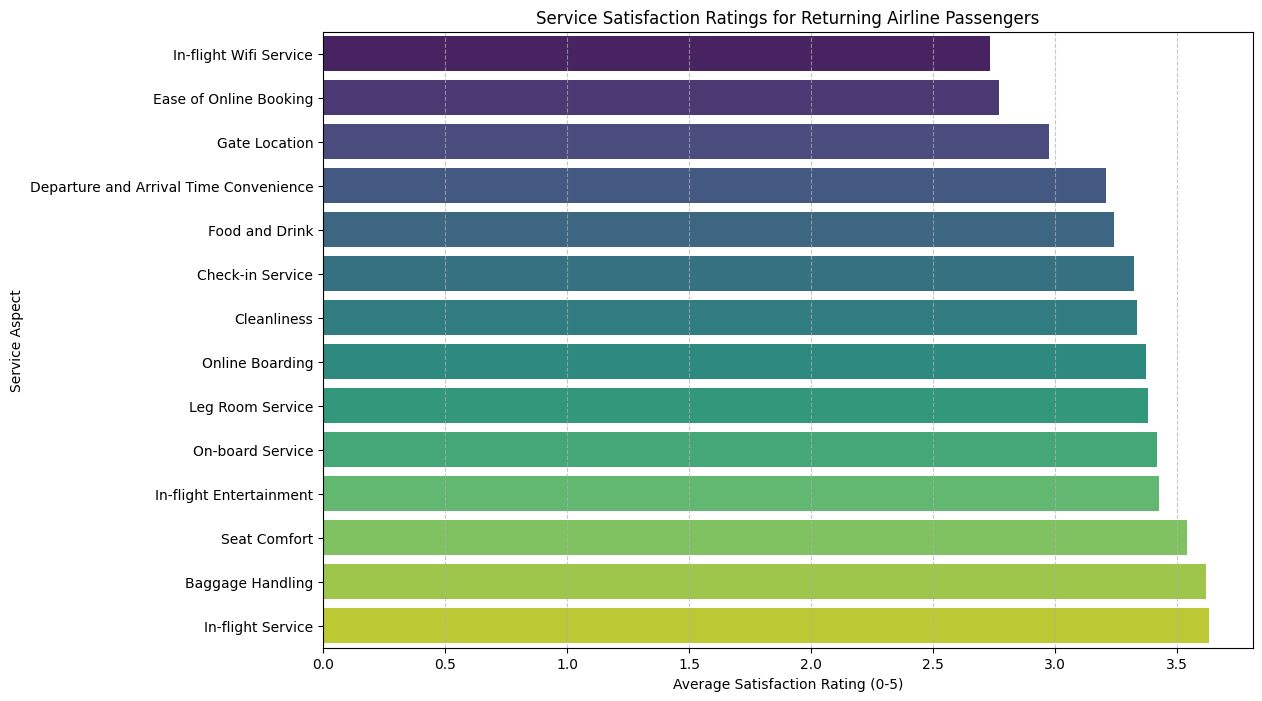

In [27]:
# Specific Service Ratings
plt.figure(figsize=(12, 8))
sns.barplot(x=service_satisfaction.values, y=service_satisfaction.index, palette='viridis')
plt.title('Service Satisfaction Ratings for Returning Airline Passengers')
plt.xlabel('Average Satisfaction Rating (0-5)')
plt.ylabel('Service Aspect')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The service satisfaction ratings for returning airline passengers are as follows (average ratings on a scale of 0 to 5):

In-flight Wifi Service: 2.73

Ease of Online Booking: 2.77

Gate Location: 2.97

Departure and Arrival Time Convenience: 3.21

Food and Drink: 3.24

Check-in Service: 3.32

Cleanliness: 3.34

Online Boarding: 3.37

Leg Room Service: 3.38

On-board Service: 3.42

In-flight Entertainment: 3.43

Seat Comfort: 3.54

Baggage Handling: 3.62

In-flight Service: 3.63


The bar chart visualizes these ratings, highlighting the areas where passengers are most and least satisfied.

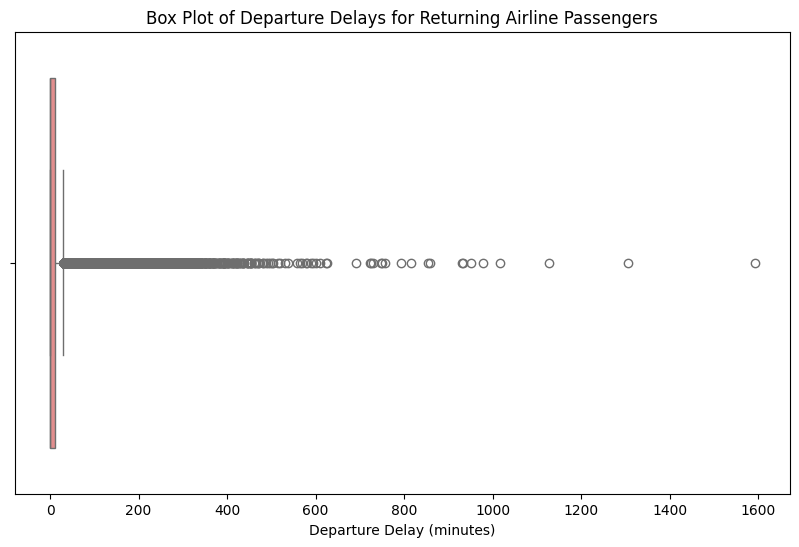

In [28]:
# Departure Delay
plt.figure(figsize=(10, 6))
sns.boxplot(x=returning_customers['Departure Delay'], color='lightcoral')
plt.title('Box Plot of Departure Delays for Returning Airline Passengers')
plt.xlabel('Departure Delay (minutes)')
plt.show()

Departure Delay Statistics:

Count: 106,100 (number of departure delay observations)

Mean: 14.64 minutes (average departure delay)

Standard Deviation: 38.20 minutes (variability in departure delay times)

Minimum: 0 minutes (no delay)

25th Percentile (Q1): 0 minutes (25% of flights have no delay)

Median (Q2): 0 minutes (50% of flights have no delay)

75th Percentile (Q3): 12 minutes (75% of flights have delays less than or equal to 12 minutes)

Maximum: 1592 minutes (maximum recorded delay)

Box Plot Interpretation:

Median Line: The thick line within the box represents the median departure delay, which is 0 minutes, indicating that more than half of the flights have no departure delay.

Interquartile Range (IQR): The box represents the middle 50% of the data, with the lower edge at the 25th percentile (0 minutes) and the upper edge at the 75th percentile (12 minutes).

Whiskers: The lines extending from the box represent the range of the data, excluding outliers. The lower whisker is at 0 minutes, and the upper whisker extends up to a point that is 1.5 times the IQR from the 75th percentile.

Outliers: Individual points beyond the whiskers represent outliers, indicating flights with unusually long departure delays.

The box plot visually summarizes the distribution of departure delays, highlighting that a significant number of flights experience no delay, while a few flights have substantially long delays.

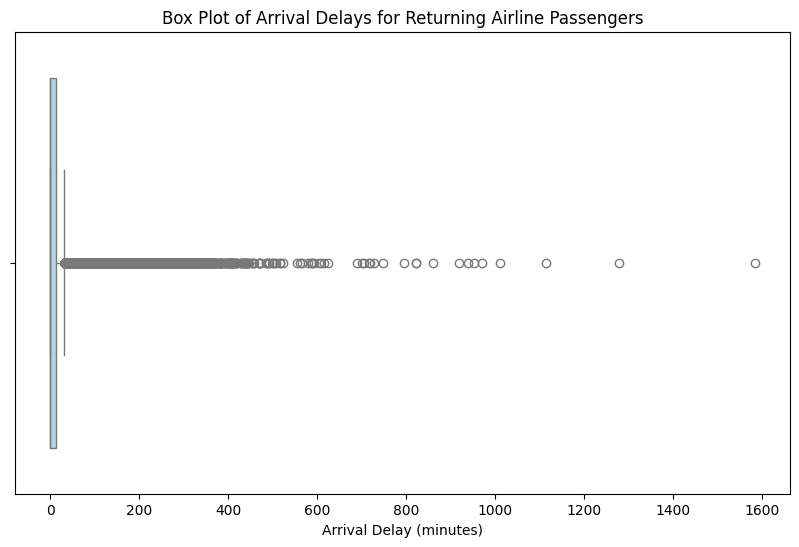

In [29]:
# Arrival Delay
plt.figure(figsize=(10, 6))
sns.boxplot(x=returning_customers['Arrival Delay'], color='lightblue')
plt.title('Box Plot of Arrival Delays for Returning Airline Passengers')
plt.xlabel('Arrival Delay (minutes)')
plt.show()

Arrival Delay Statistics:

Count: 105,773 (number of arrival delay observations)

Mean: 15.00 minutes (average arrival delay)

Standard Deviation: 38.55 minutes (variability in arrival delay times)

Minimum: 0 minutes (no delay)

25th Percentile (Q1): 0 minutes (25% of flights have no delay)

Median (Q2): 0 minutes (50% of flights have no delay)

75th Percentile (Q3): 13 minutes (75% of flights have delays less than or equal to 13 minutes)

Maximum: 1584 minutes (maximum recorded delay)

Box Plot Interpretation:

Median Line: The thick line within the box represents the median arrival delay, which is 0 minutes, indicating that more than half of the flights have no arrival delay.

Interquartile Range (IQR): The box represents the middle 50% of the data, with the lower edge at the 25th percentile (0 minutes) and the upper edge at the 75th percentile (13 minutes).

Whiskers: The lines extending from the box represent the range of the data, excluding outliers. The lower whisker is at 0 minutes, and the upper whisker extends up to a point that is 1.5 times the IQR from the 75th percentile.

Outliers: Individual points beyond the whiskers represent outliers, indicating flights with unusually long arrival delays.

The box plot visually summarizes the distribution of arrival delays, highlighting that a significant number of flights experience no delay, while a few flights have substantially long delays.

### Does flight distance affect customer preferences or flight patterns?

In [30]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [31]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

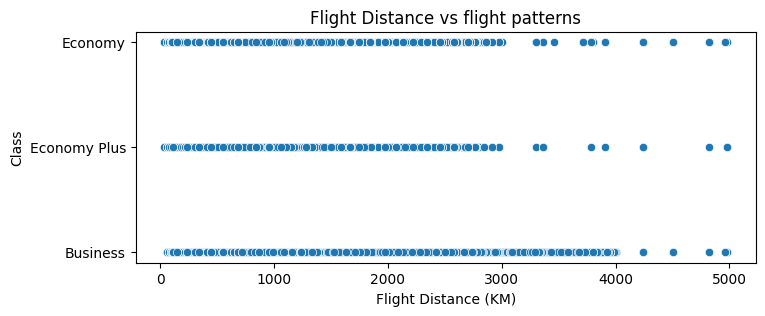

In [32]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance (KM)')
plt.ylabel('Class')

If the flight distance is less than 3000 km, the flight patterns are similar. However, for distances greater than 3000 km, a higher proportion of passengers choose business class.

# Flight distance vs passenger satisfaction

In [33]:
# Clean the blanks from Flight Distance and Satisfaction
df = df.dropna(subset=['Flight Distance','Satisfaction'])

In [34]:
# Binning the flight distance every 500 KM
bins = range(0,5000,500)
labels = [f'{b} - {b+500}' for b in bins[:-1]]
df['Distance Range(KM)'] = pd.cut(df['Flight Distance'], bins = bins, labels = labels, right = False)

In [35]:
# Grouping by the Distance Range and satisfaction to get the count
df_grouped_bins = df.groupby(['Distance Range(KM)','Satisfaction']).size().unstack(fill_value=0)
df_grouped_bins = df_grouped_bins[['Satisfied','Neutral or Dissatisfied']]

# Calculate the ppercentage
df_percentage = df_grouped_bins.div(df_grouped_bins.sum(axis=1),axis=0) * 100

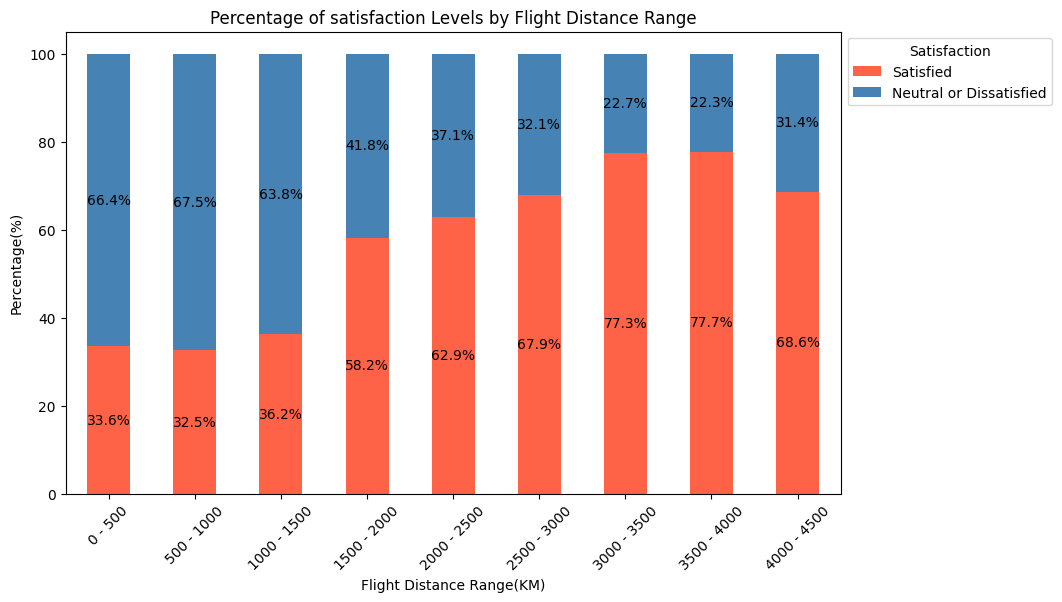

In [36]:
# Plotting the percentage data as a stacked column chart
ax=df_percentage.plot(kind = 'bar', stacked=True, figsize=(10,6), color=['#FF6347','#4682B4'])
plt.title('Percentage of satisfaction Levels by Flight Distance Range')
plt.xlabel('Flight Distance Range(KM)')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction',loc='upper left',bbox_to_anchor=(1,1))

# Adding percentage labels on the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='black', fontsize=10)

plt.show()

When the flight distance is less than 4000 KM, greater flight distance is associated with higher satisfaction.

# Departure Delay and Arrival Delay vs Satisfaction

In [37]:
# Clean the blanks from Departure Delay, Arrival Dealy and Satisfaction
df = df.dropna(subset=['Departure Delay','Arrival Delay','Satisfaction'])

In [38]:
# Convert dissatisfaction levels to binary (1 for dissatisfaction, 0 for satisfaction)
df['Neutral or Dissatisfied'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Neutral or Dissatisfied' else 0)

In [39]:
# Define delay ranges
delay_ranges = {
    '<30': (0,30),
    '30-60': (30,60),
    '60-90': (60,90),
    '90-120': (90,120),
    '>120': (120, float('inf'))
}

In [41]:
# Function to categorize delays
def categorize_delay(delay,ranges):
    for label, (low, high) in ranges.items():
        if low <=delay <high:
            return label
    return '>120'

In [42]:
# Apply categorization
df['Departure Delay Range'] = df['Departure Delay'].apply(lambda x: categorize_delay(x,delay_ranges))
df['Arrival Delay Range'] = df['Arrival Delay'].apply(lambda x: categorize_delay(x, delay_ranges))

In [43]:
# Group by delay ranges and calculate dissatisfaction rates
grouped = df.groupby(['Departure Delay Range','Arrival Delay Range'])['Neutral or Dissatisfied'].mean().reset_index()

# Define the desired order for Departure Delay Range and Arrival Delay Range
Ordered_departure_delay = ['>120','90-120','60-90','30-60','<30']
Ordered_arrival_delay = ['<30','30-60','60-90','90-120','>120']

#Pivot tale for heatmap
heatmap_data = grouped.pivot(index='Departure Delay Range',columns = 'Arrival Delay Range', values='Neutral or Dissatisfied')
heatmap_data = heatmap_data.reindex(index=Ordered_departure_delay,columns=Ordered_arrival_delay)

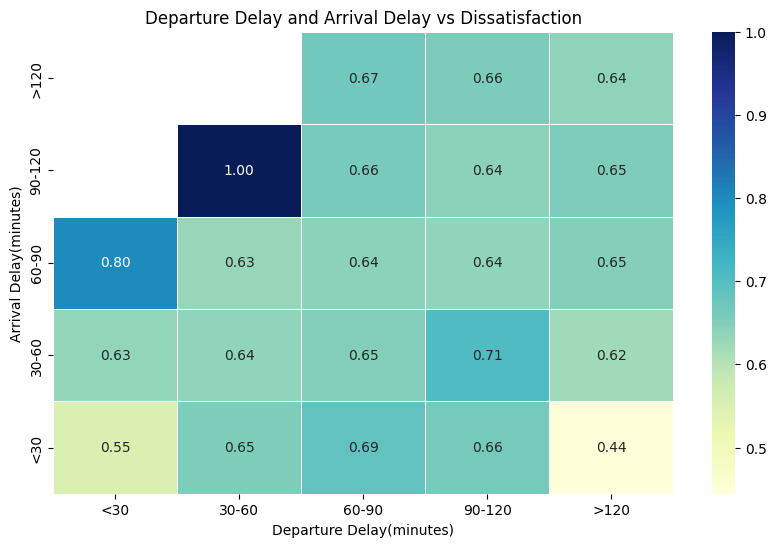

In [44]:
# Plotting the scatter plot
plt.figure(figsize = (10,6))
sns.heatmap(heatmap_data,annot=True, cmap='YlGnBu',fmt='.2f',linewidths=.5)
plt.title('Departure Delay and Arrival Delay vs Dissatisfaction')
plt.xlabel('Departure Delay(minutes)')
plt.ylabel('Arrival Delay(minutes)')
plt.show()

The departure and arrival delays contribute to dissatisfaction, but they do not show a significant change across different delay intervals. The peak in dissatisfaction occurs when the departure delay is between 30-60 minutes and the arrival delay is between 90-120 minutes.

Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [45]:
# Convert categorical variables to numerical if needed
df = pd.get_dummies(df, drop_first=True)

In [46]:
# Define features and target
X = df.drop('Satisfaction_Satisfied', axis=1)
y = df['Satisfaction_Satisfied']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [49]:
# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

                    Feature  Importance
19  Neutral or Dissatisfied    0.550006
8           Online Boarding    0.099247
24           Class_Business    0.072973
16   In-flight Wifi Service    0.055059
22  Type of Travel_Personal    0.042936
17  In-flight Entertainment    0.038741
11             Seat Comfort    0.021030
12         Leg Room Service    0.016211
6    Ease of Online Booking    0.014107
10         On-board Service    0.011873


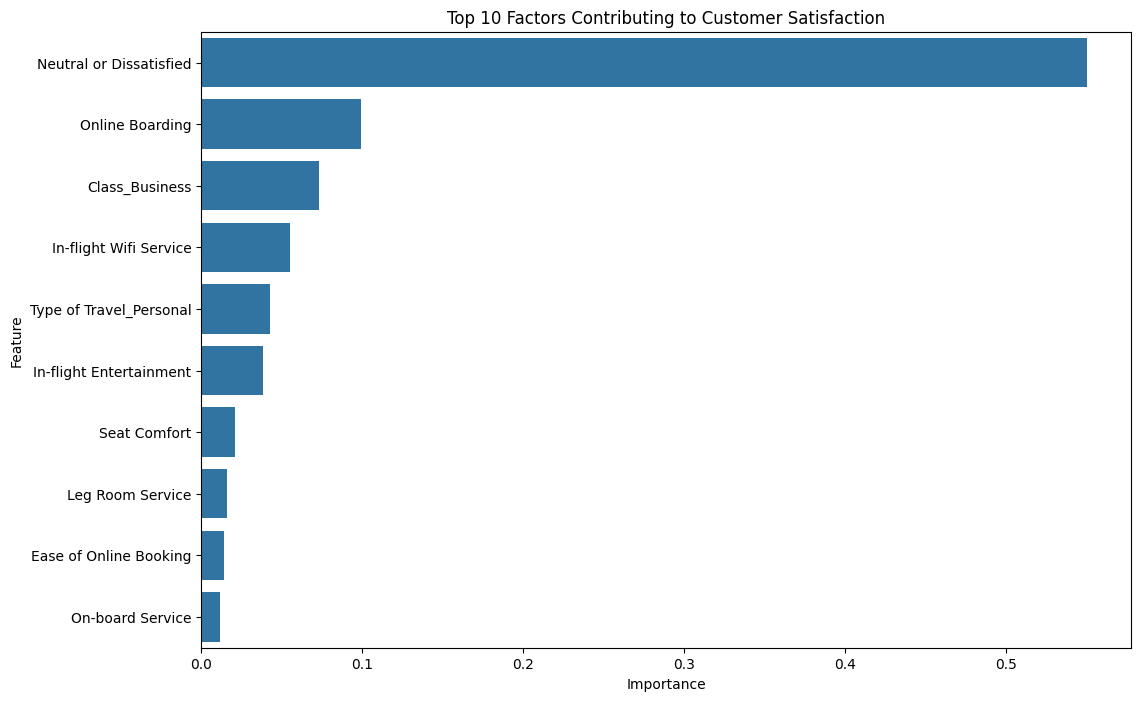

In [50]:
# Plot the top 10 features contributing to satisfaction
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Factors Contributing to Customer Satisfaction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot of the top 10 factors contributing to customer satisfaction shows that online borading is the most important factor, followed by in-flight wifi service and type of travel personal. These factors are critical as they directly affect the passenger experience during the flight. On the other hand, logistical factors like gate location and Departure and Arrival Time Convenience are also significant, though they might not directly impact the in-flight experience, they influence overall travel satisfaction.

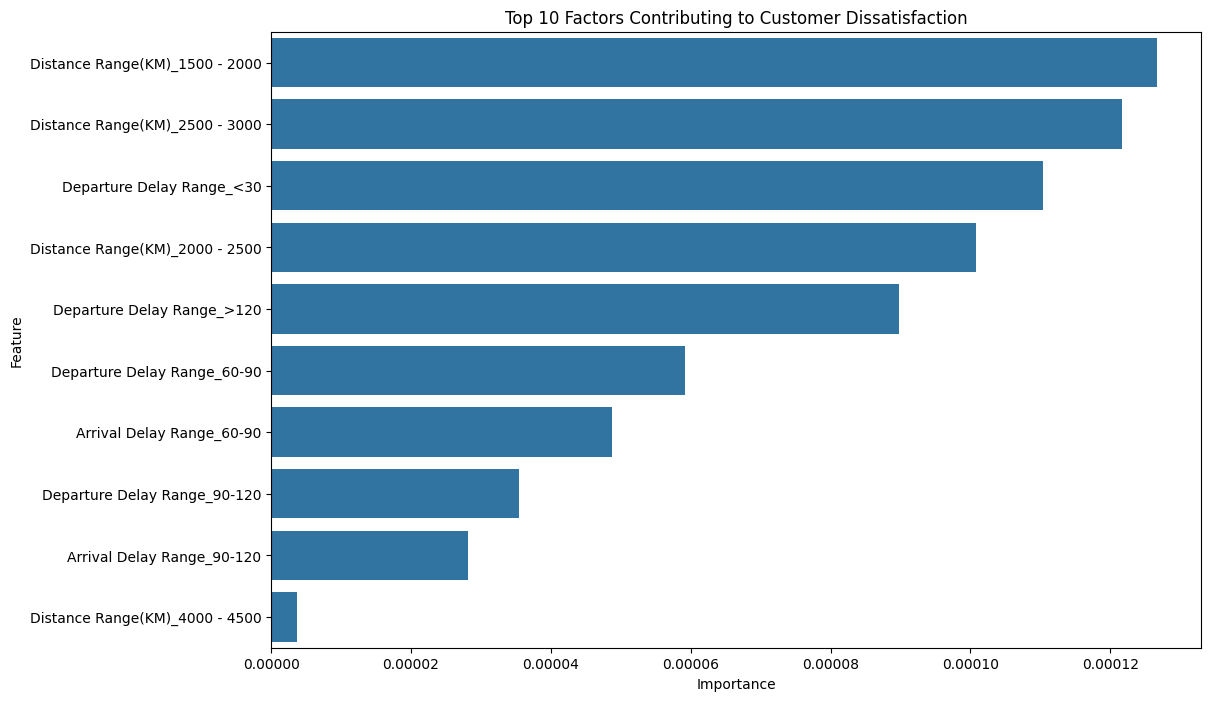

In [51]:
# Plot the least contributing factors (dissatisfaction)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.tail(10))
plt.title('Top 10 Factors Contributing to Customer Dissatisfaction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot of the bottom 10 factors contributing to customer dissatisfaction shows that baggage handling and check-in service are the most significant contributors to dissatisfaction. 

Baggage Handling affects passengers' travel experience by causing inconvenience and stress due to issues with luggage delivery. Ensuring reliable and efficient baggage handling processes can greatly enhance customer satisfaction.

Check-in Service sets the initial tone for the passenger’s journey. Problems at this stage can create a poor first impression and impact overall satisfaction. Improving check-in procedures, reducing wait times, and enhancing staff interactions are essential for a positive travel experience.